# UCI Heart Disease Neural Network Classification
### Course: Machine Learning
### Instructor: Dr. Golnaz Baghdadi
### Author: Mohammad Ahadzadeh
#### Date: May 31, 2025

## Introduction

### Project Overview
This project focuses on the application of shallow neural networks for medical prediction, specifically to forecast the likelihood of heart disease in patients. We will be utilizing the "Heart Disease UCI" dataset, a widely recognized collection of medical data containing various patient attributes relevant to cardiac health. The primary goal is to build a predictive model and explore its capabilities in a medical context.

### Objectives
The key objectives for this project are:

- To implement a shallow neural network, specifically one with one or two hidden layers, using the PyTorch library.

- To train this neural network using the Heart Disease UCI medical dataset and subsequently evaluate its performance in predicting heart disease.

- To conduct a comparative analysis by evaluating the performance of the implemented neural network against other established machine learning models.

- To investigate and analyze the impact of architectural choices, such as the number of hidden layers and the number of neurons within these layers, on the overall performance of the neural network model.


## Setup and Environment Configuration

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
torch.manual_seed(715)

### Device Configuration

In [2]:
device = torch.device('cuda')

## Data Loading and Initial Exploration

### Load Dataset

In [3]:
path = 'heart_disease_uci.csv'
df = pd.read_csv(path)

### Data Inspection

In [4]:
print(df.shape)

(920, 16)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB
None


In [6]:
print(df.describe())

               id         age    trestbps        chol      thalch     oldpeak  \
count  920.000000  920.000000  861.000000  890.000000  865.000000  858.000000   
mean   460.500000   53.510870  132.132404  199.130337  137.545665    0.878788   
std    265.725422    9.424685   19.066070  110.780810   25.926276    1.091226   
min      1.000000   28.000000    0.000000    0.000000   60.000000   -2.600000   
25%    230.750000   47.000000  120.000000  175.000000  120.000000    0.000000   
50%    460.500000   54.000000  130.000000  223.000000  140.000000    0.500000   
75%    690.250000   60.000000  140.000000  268.000000  157.000000    1.500000   
max    920.000000   77.000000  200.000000  603.000000  202.000000    6.200000   

               ca         num  
count  309.000000  920.000000  
mean     0.676375    0.995652  
std      0.935653    1.142693  
min      0.000000    0.000000  
25%      0.000000    0.000000  
50%      0.000000    1.000000  
75%      1.000000    2.000000  
max      3.000

In [7]:
print(df.head())

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  exang  oldpeak        slope   ca  \
0  lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1  lv hypertrophy   108.0   True      1.5         flat  3.0   
2  lv hypertrophy   129.0   True      2.6         flat  2.0   
3          normal   187.0  False      3.5  downsloping  0.0   
4  lv hypertrophy   172.0  False      1.4    upsloping  0.0   

                thal  num  
0       fixed defect    0  
1             normal    2  
2  reversable defect    1  
3             normal    0  
4             normal    0  


### Drop Index Column

In [8]:
df.drop('id', axis=1, inplace=True)

### Class balance

Text(0.5, 1.0, 'Distribution of Heart Disease Classes')

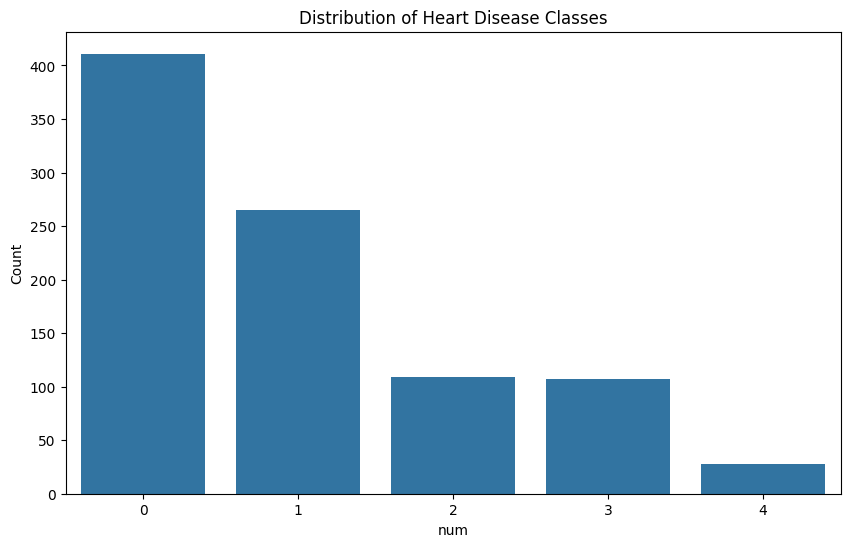

In [10]:
counts = df['num'].value_counts().sort_index()
percentages = df['num'].value_counts(normalize=True).sort_index() * 100
plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('num')
plt.ylabel('Count')
plt.title('Distribution of Heart Disease Classes')

### Correlation Heatmap

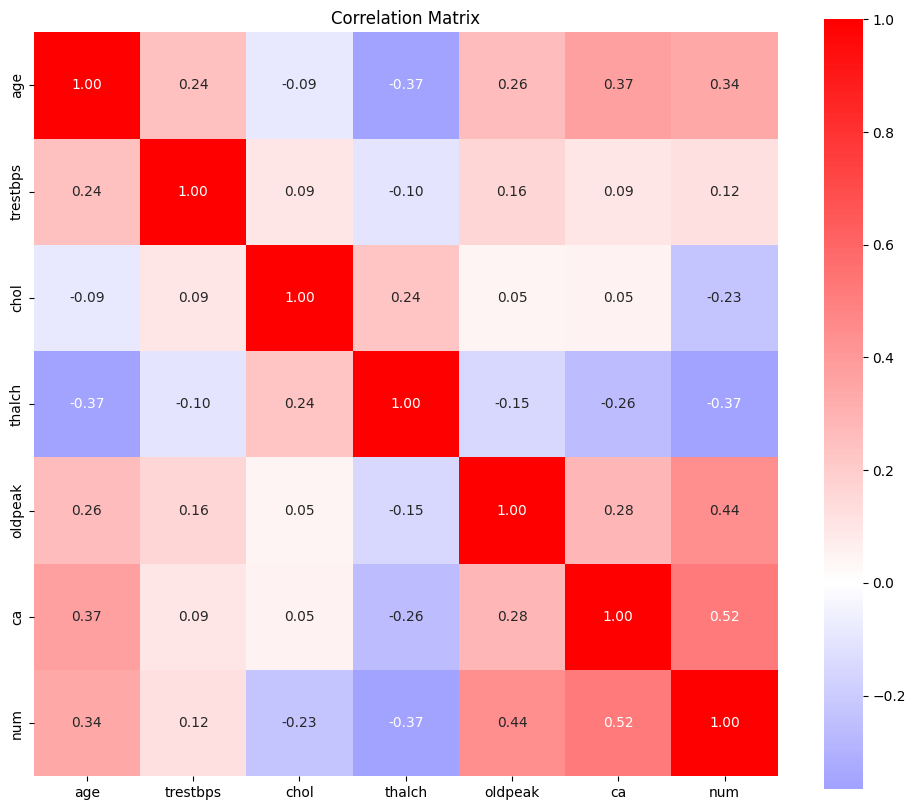

In [11]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="bwr", center=0, square=True)
plt.title("Correlation Matrix")
plt.show()

## Data Preprocessing

### Separating Features and Target Variable

In [12]:
X = df.drop('num', axis=1)
y = df['num']

### Identifying Data Types

In [13]:
cat_cols = np.array(X.select_dtypes(include=['object']).columns.tolist())
numeric_cols = np.array(X.select_dtypes(include=['int64', 'float64']).columns.tolist())
print(f"Categorical columns: {cat_cols}")
print(f"Numerical columns: {numeric_cols}")

Categorical columns: ['sex' 'dataset' 'cp' 'fbs' 'restecg' 'exang' 'slope' 'thal']
Numerical columns: ['age' 'trestbps' 'chol' 'thalch' 'oldpeak' 'ca']


### Handling Missing Values

In [14]:

num_imputer = IterativeImputer(max_iter=10, random_state=715)
cat_imputer = SimpleImputer(strategy='most_frequent')
X_num = num_imputer.fit_transform(df[numeric_cols])
X_cat = cat_imputer.fit_transform(df[cat_cols])

### One-Hot Encoding of Categorical Variables

In [15]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_cat = pd.DataFrame(encoder.fit_transform(X_cat))

### Scaling Numerical Features

In [16]:
scaler = StandardScaler()
X_num = pd.DataFrame(scaler.fit_transform(X_num))

### Concatenating Preprocessed Data

In [17]:
X = pd.concat([X_num, X_cat], axis=1)

### SMOTE

In [18]:
smote = SMOTE(random_state=715)
X_resampled, y_resampled = smote.fit_resample(X, y)


c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 556, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", l

### Train-Test Split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, stratify=y_resampled, random_state=715)

### Loading Data into PyTorch

In [20]:
class heart_dataset(Dataset):
    def __init__(self, features, targets):
        self.X = torch.tensor(features.values, dtype=torch.float32)
        self.y = torch.tensor(targets.values, dtype=torch.long)
    def __len__(self):
        return len(self.y)
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]
    
train_dataset = heart_dataset(X_train, y_train)
test_dataset  = heart_dataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=batch_size, shuffle=False)

## Model Definition

We will define a fully connected neural network using PyTorch with the following architecture:

- Input layer size equal to the number of input features  
- Two hidden layers with ReLU activations  
- One output neuron with sigmoid activation for binary classification  


In [21]:
class HeartDiseaseNet(nn.Module):
    def __init__(self, input_dim, hidden1=128, hidden2=64, hidden3=32, output_dim=5):
        super(HeartDiseaseNet, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.ReLU(),
            nn.Linear(hidden1, hidden2),
            nn.ReLU(),
            nn.Linear(hidden2, hidden3),
            nn.ReLU(),
            nn.Linear(hidden3, output_dim)
        )

    def forward(self, x):
        return self.network(x)

input_size = X_resampled.shape[1]
model = HeartDiseaseNet(input_dim=input_size).to(device)

## Training Loop

In this section, we define the loss function, optimizer, and the training loop that updates the model weights. The model is trained over a fixed number of epochs using binary cross-entropy loss and the Adam optimizer.


In [22]:
num_epochs = 100
learning_rate = 0.001

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=learning_rate)

train_losses = []

model.train()
for epoch in range(num_epochs):
    epoch_loss = 0.0
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        
        outputs = model(batch_X) 
        loss = criterion(outputs, batch_y)  

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item() * batch_X.size(0)

    avg_loss = epoch_loss / len(train_loader.dataset)
    train_losses.append(avg_loss)


## Validation & Evaluation

In this section, we evaluate the trained model on the test set using standard multi-class metrics:

- Accuracy  
- Precision, Recall, F1-score  
- Confusion Matrix  
- Classification Report  


In [23]:
model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X = batch_X.to(device)
        outputs = model(batch_X)
        preds = torch.argmax(outputs, dim=1).cpu().numpy()
        labels = batch_y.numpy()
        
        all_preds.extend(preds)
        all_labels.extend(labels)

accuracy = accuracy_score(all_labels, all_preds)
print("Test Accuracy:", round(accuracy, 4))

Test Accuracy: 0.8662


In [24]:
report = classification_report(all_labels, all_preds, digits=4)
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

           0     0.8571    0.7317    0.7895        82
           1     0.7253    0.8049    0.7630        82
           2     0.9351    0.8780    0.9057        82
           3     0.8556    0.9277    0.8902        83
           4     0.9759    0.9878    0.9818        82

    accuracy                         0.8662       411
   macro avg     0.8698    0.8660    0.8660       411
weighted avg     0.8698    0.8662    0.8661       411



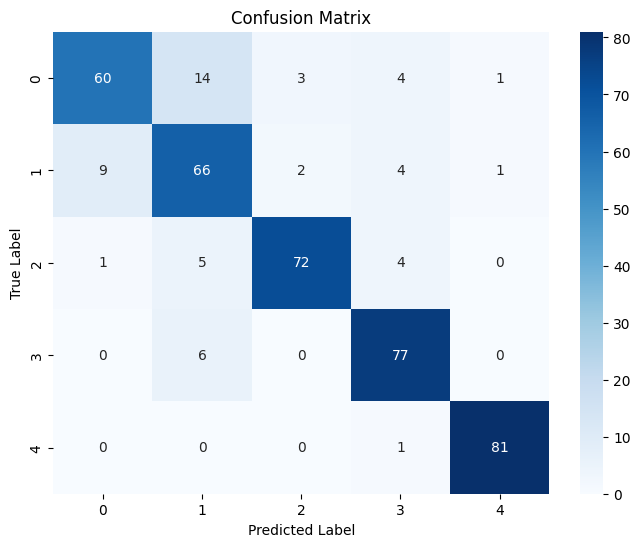

In [25]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(5), yticklabels=range(5))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


## Hyperparameter Experiments

In this section, we explore the impact of varying key hyperparameters on model performance. We will focus on:

- Hidden layer sizes
- Learning rate
- Batch size

The goal is to identify configurations that yield better generalization on the validation set.


In [26]:
def run_experiment(hidden1, hidden2, hidden3, lr, batch_size, num_epochs=30):
    model = HeartDiseaseNet(
        input_dim=X_train.shape[1],
        hidden1=hidden1,
        hidden2=hidden2,
        hidden3=hidden3
    ).to(device)

    train_dataset = heart_dataset(X_train, y_train)
    test_dataset = heart_dataset(X_test, y_test)

    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

    criterion = nn.CrossEntropyLoss(weight=class_weights)
    optimizer = optim.Adam(model.parameters(), lr=lr)

    model.train()
    for epoch in range(num_epochs):
        for batch_X, batch_y in train_loader:
            batch_X, batch_y = batch_X.to(device), batch_y.to(device)

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    model.eval()
    all_preds, all_labels = [], []
    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            batch_X = batch_X.to(device)
            outputs = model(batch_X)
            preds = torch.argmax(outputs, dim=1).cpu().numpy()
            labels = batch_y.numpy()

            all_preds.extend(preds)
            all_labels.extend(labels)

    return f1_score(all_labels, all_preds, average='macro')


In [27]:
hidden_sizes = [(128, 64, 32), (256, 128, 64), (64, 32, 16)]
learning_rates = [1e-3, 5e-4, 1e-4]
batch_sizes = [16, 32, 64]

results = []

for hs in hidden_sizes:
    for lr in learning_rates:
        for bs in batch_sizes:
            f1 = run_experiment(*hs, lr, bs)
            results.append({
                "Hidden Layers": hs,
                "LR": lr,
                "Batch Size": bs,
                "Macro F1": round(f1, 4)
            })


In [28]:
results_df = pd.DataFrame(results)
results_df.sort_values(by="Macro F1", ascending=False).reset_index(drop=True)

,Hidden Layers,LR,Batch Size,Macro F1
0,"(256, 128, 64)",0.0010,32,0.8751
1,"(256, 128, 64)",0.0010,16,0.8716
2,"(256, 128, 64)",0.0010,64,0.8606
3,"(128, 64, 32)",0.0010,16,0.8593
4,"(256, 128, 64)",0.0005,16,0.8519
5,"(128, 64, 32)",0.0010,32,0.8499
6,"(256, 128, 64)",0.0005,32,0.8333
7,"(64, 32, 16)",0.0010,16,0.8254
8,"(256, 128, 64)",0.0005,64,0.8132
9,"(128, 64, 32)",0.0005,16,0.8103


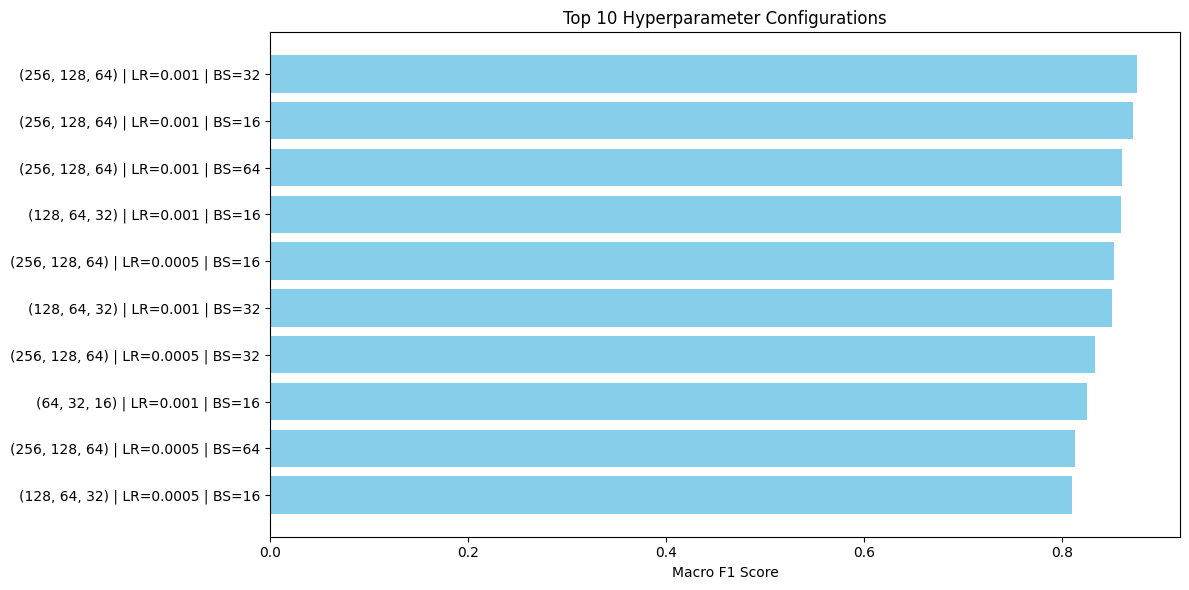

In [29]:
top_configs = results_df.sort_values(by="Macro F1", ascending=False).head(10)

top_configs["Label"] = (
    top_configs["Hidden Layers"].astype(str)
    + " | LR=" + top_configs["LR"].astype(str)
    + " | BS=" + top_configs["Batch Size"].astype(str)
)

plt.figure(figsize=(12, 6))
plt.barh(top_configs["Label"], top_configs["Macro F1"], color="skyblue")
plt.xlabel("Macro F1 Score")
plt.title("Top 10 Hyperparameter Configurations")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


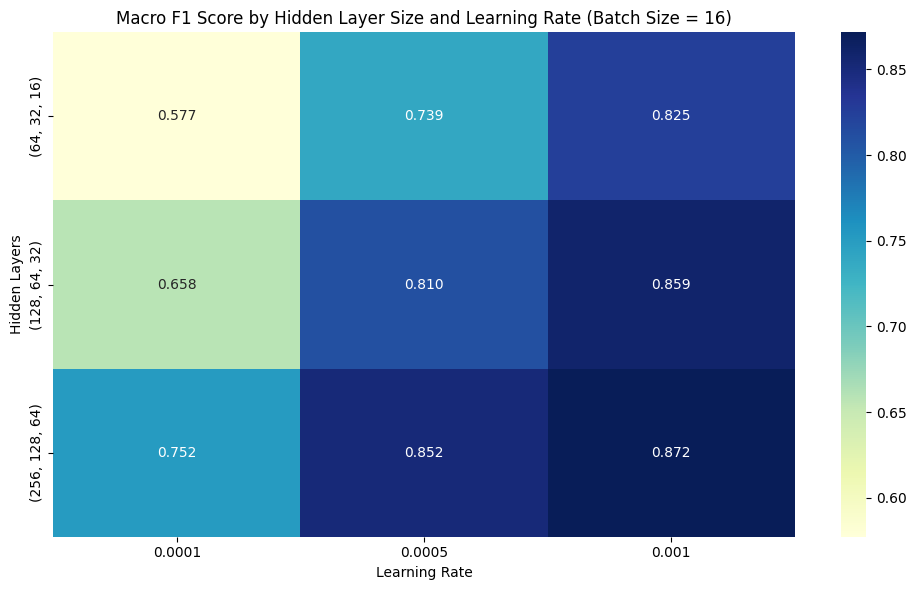

In [30]:
heatmap_df = results_df[results_df["Batch Size"] == 16].pivot_table(
    index="Hidden Layers", columns="LR", values="Macro F1"
)

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_df, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title("Macro F1 Score by Hidden Layer Size and Learning Rate (Batch Size = 16)")
plt.ylabel("Hidden Layers")
plt.xlabel("Learning Rate")
plt.tight_layout()
plt.show()


## Baseline Comparisons

In this section, we evaluate several traditional machine learning models on the same SMOTE-balanced dataset used for training the neural network. These models include:

- Logistic Regression  
- Linear Discriminant Analysis (LDA)  
- Decision Tree  
- Random Forest  
- Ensemble Voting Classifier  
- K-Nearest Neighbors (KNN)  
- Naive Bayes  
- Support Vector Machine (SVM)

All models are trained using the default hyperparameters unless otherwise noted, and evaluated using accuracy, precision, recall, and macro F1-score.



In [31]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=715),
    'LDA': LinearDiscriminantAnalysis(),
    'Decision Tree': DecisionTreeClassifier(random_state=715),
    'Random Forest': RandomForestClassifier(random_state=715),
    'Ensemble': VotingClassifier([
        ('lr', LogisticRegression(max_iter=1000, random_state=715)),
        ('rf', RandomForestClassifier(random_state=715)),
        ('svc', SVC(probability=True, random_state=715))
    ], voting='soft'),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=715)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    macro_f1 = f1_score(y_test, y_pred, average='macro')
    results.append({
        'Model': name,
        'Accuracy': round(acc, 4),
        'Macro F1': round(macro_f1, 4),
        'Report': classification_report(y_test, y_pred, digits=4, output_dict=False)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="Macro F1", ascending=False).reset_index(drop=True)

c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Zesyrus\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

,Model,Accuracy,Macro F1,Report
0,Random Forest,0.8589,0.8565,precision recall f1-score ...
1,Ensemble,0.8029,0.7995,precision recall f1-score ...
2,KNN,0.7981,0.7932,precision recall f1-score ...
3,SVM,0.7689,0.7636,precision recall f1-score ...
4,Decision Tree,0.7372,0.7368,precision recall f1-score ...
5,Logistic Regression,0.5572,0.5580,precision recall f1-score ...
6,LDA,0.5401,0.5471,precision recall f1-score ...
7,Naive Bayes,0.4136,0.3580,precision recall f1-score ...


## Discussion of Results


### Summary of Findings

The deep neural network achieved the **highest accuracy and macro F1 score**, outperforming all traditional classifiers. However, several non-deep-learning models, especially **Random Forest** and **Ensemble Voting**, also demonstrated strong performance and provide viable alternatives.

### Model Insights

- **Neural Network**  
  Achieved the most balanced and accurate results. Particularly strong at capturing complex feature interactions, especially when supported by SMOTE and class weighting.

- **Random Forest**  
  Strongest performer among traditional models. Its ability to handle nonlinearity, feature interactions, and class imbalance makes it a reliable baseline.

- **Ensemble (Soft Voting)**  
  Combined strengths of logistic regression, random forest, and SVM. It delivered solid performance, slightly below Random Forest but well above simpler models.

- **K-Nearest Neighbors (KNN)**  
  Performed surprisingly well. Sensitive to feature scaling and data noise but benefits from SMOTE-balanced data.

- **SVM (RBF Kernel)**  
  Generalized well, especially with soft voting in the ensemble. Ideal for small-to-medium datasets with complex boundaries.

- **Decision Tree**  
  Performed reasonably well, but likely overfitting slightly without pruning or regularization.

- **Logistic Regression & LDA**  
  Limited by linear assumptions. These models underperformed due to the nonlinear and imbalanced nature of the dataset.

- **Naive Bayes**  
  Performed poorly due to its strong independence assumptions, which don’t hold for this medical dataset.